In [2]:
import tweepy
import pandas as pd
import numpy as np

## Coleta de dados

In [3]:
# credenciais de autenticaçãoc
consumer_API_Key ="HNOrCXXZhTE3FCWOolQyP0Nos"
consumer_API_secret_key = "u715txI4xfxzl1tY1JwsOJDhbRqT6s7kEGUmZodgRnUfM0oDnB"
access_token = "236964618-wpro3lqcmBpfTI0ZxIWLhPTCW41WeGzGDTmrB7Vi"
access_token_secret = "nxDh1g4dYAt6XvHZWBUvD9TolJThaWauhrqtjrsBesnBv"

In [4]:
# autenticação na API
auth = tweepy.OAuthHandler(consumer_API_Key,consumer_API_secret_key)
auth.set_access_token(access_token,access_token_secret)
token = tweepy.API(auth)

In [5]:
#Construindo a instancia da API - 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,
                 retry_count=5, retry_delay=10)

In [ ]:
api.update_status('This tweet is an example. It\'s showing how to tweet via API.\
I\'m using it during my work in BootCamp of Data Scientist by IGTI. \n #igti #datascience')

In [7]:
#Definir que palavras (keyword) que deseja pesquisar no Twitter

keyword = ('data scientist OR data science OR big data OR machine learning')
#keyword = ('#homeoffice OR #trabalhoremoto')
# keyword = ('home office OR trabalho remoto OR homeoffice OR trabalhoremoto OR #homeoffice')
# keyword = ('covid-19 OR covid OR coronavirus OR pandemic')

In [8]:
# Fazer a busca por palavra chave
# result_type --> mixed(default), recent, popular
# tweets --> variável que irá armazenar todos os tweets  com a palavra escolhida
# tweets = token.search(q=keyword, count=1000, result_type="popular", tweet_mode='extended', lang='pt')

In [17]:
info1 = []
tweets = []
for tweet in tweepy.Cursor(api.search,
                           q=keyword, tweet_mode='extended',
                           rpp=1000, result_type="mixed",lang='en',
                           include_entitiews=True).items(3000):
    
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
    
    newtweet = aux.replace("\n"," ")
    
    tweets.append(newtweet)
    info1.append(tweet)
    file = open("tweets_big_data.json","a", -1,"utf-8")
    file.write(newtweet+'\n')
    file.close()
    

In [10]:
print(F'Total de tweets coletados foram {len(tweets3)}')  #covid en

Total de tweets coletados foram 2000


In [12]:
print(F'Total de tweets coletados foram {len(info)}')  #covid en

Total de tweets coletados foram 2000


In [18]:
print(F'Total de tweets coletados foram {len(tweets)}')  #big data en

Total de tweets coletados foram 483


In [19]:
print(F'Total de tweets coletados foram {len(info1)}')  #big data en

Total de tweets coletados foram 483


In [32]:
print(F'Total de tweets coletados foram {len(info2)}')  #homeoffice en

Total de tweets coletados foram 718


## Análise exploratória dos tweets

In [20]:
#criando dataframe sobre BigData
tweets_df = pd.DataFrame(tweets, columns=['Tweets'])

tweets_df['len']= np.array([len(tweet) for tweet in tweets])
tweets_df['ID']= np.array([tweet.id for tweet in info1])
tweets_df['USER']= np.array([tweet.user.screen_name for tweet in info1])
tweets_df['useName']= np.array([tweet.user.name for tweet in info1])
tweets_df['User Location']= np.array([tweet.user.location for tweet in info1])
tweets_df['Language']=np.array([tweet.user.lang for tweet in info1])
tweets_df['Date']=np.array([tweet.created_at for tweet in info1])
tweets_df['Source']=np.array([tweet.source for tweet in info1])
tweets_df['Likes']=np.array([tweet.favorite_count for tweet in info1])
tweets_df['Retweets']=np.array([tweet.retweet_count for tweet in info1])
tweets_df['Geo']=np.array([tweet.geo for tweet in info1])
tweets_df['Coordinates']=np.array([tweet.coordinates for tweet in info1])
tweets_df['Place']=np.array([tweet.place for tweet in info1])

# tweets_df.to_csv("tweets_mixed_big_data.csv")

In [21]:
tweets_df[tweets_df['User Location'] != ''].head(10)

,Tweets,len,ID,USER,useName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,[UPDATED this year] Free PDF #DataScience Chea...,306,1291742991992999937,KirkDBorne,Kirk Borne,"Maryland, USA",None,2020-08-07 14:28:23,Twitter for iPhone,371,173,None,None,None
2,“We do not feel that at this time that the sci...,224,1289313521231069191,Local4News,Local 4 WDIV Detroit,"Detroit, MI",None,2020-07-31 21:34:32,SocialNewsDesk,90,24,None,None,None
3,Data Science and Machine–Learning Platforms Ma...,139,1292519063156031488,into_AI,Neurons.AI - The Global AI Ecosystem #intoAI #AI,talk@into.AI,None,2020-08-09 17:52:13,into.AI,0,1,None,None,None
4,These skills are still “Top 10 Tech Skills” in...,279,1292517484822749184,idrisbadmos7,idriskadiri,"Lagos, Nigeria",None,2020-08-09 17:45:56,Twitter for Android,0,263,None,None,None
5,Best Public Datasets for Machine Learning and ...,97,1292517147285970945,sepia_sheep,แกะซีเปีย. ティン。,"กรุงเทพมหานคร, ประเทศไทย",None,2020-08-09 17:44:36,Twitter for Android,0,0,None,None,None
6,Data Science and Machine-Learning Platforms Ma...,137,1292516460196225024,AINewsFeed,AI News Feed,United States,None,2020-08-09 17:41:52,SendAlertsToTwitter,1,0,None,None,None
7,We completed one year of out-performance! We ...,250,1292516301982724096,OnlineBook4,Online Book,Spain,None,2020-08-09 17:41:14,Twitter Web App,0,8,None,None,None
9,[UPDATED this year] Free PDF #DataScience Chea...,306,1292515924914900993,Bomoimajid,Bomoi Abdulmajid,Nigeria,None,2020-08-09 17:39:44,Twitter for Android,0,113,None,None,None
10,Machine Learning and Data Science: Signal Anal...,126,1292515666659020806,LSmawd,SMAWD INT'l,Global,None,2020-08-09 17:38:43,Twitter Web App,1,0,None,None,None
11,Best Public Datasets for Machine Learning and ...,114,1292513556873785344,developersbot,DevelopersDiscussion.com,AWS Server,None,2020-08-09 17:30:20,,0,2,None,None,None


In [25]:
tweets_df = pd.read_csv('tweets_mixed_big_data_en.csv')
tweets_df.describe

<bound method NDFrame.describe of       Unnamed: 0                                             Tweets  len  \
0              0  [UPDATED this year] Free PDF #DataScience Chea...  137   
1              1  Have you ever tried to put a large dataset or ...  140   
2              2  When it comes to returning to school, we shoul...  140   
3              3  #FEATURED #COURSES The #Data #Science Course 2...  137   
4              4  Decided to go back to a Udemy course I bought ...  140   
...          ...                                                ...  ...   
2636        2636  Defining #DataScience, #MachineLearning, And #...  139   
2637        2637  Defining #DataScience, #MachineLearning, And #...  139   
2638        2638  Defining #DataScience, #MachineLearning, And #...  139   
2639        2639  As many data science professionals begin to wo...  140   
2640        2640  Huge List of Free Artificial Intelligence, Mac...  118   

                       ID             USER           

In [26]:
# Tweets com maior numero de LIkes
likes_max = np.max(tweets_df['Likes']) # funçao max do numpy identifica o valor maximo
likes_min = np.min(tweets_df['Likes']) # função min do numpy identifica o valor minimo

likes = tweets_df[tweets_df['Likes'] == likes_max] # pega o primeiro tweet com valor maximo

print(f"O tweet com mais curtidas (likes) é: \n{likes}")
print(f"Numero de curtidas: {likes_max}")
print(f'O menor número de curtida: {likes_min}')

O tweet com mais curtidas (likes) é: 
     Unnamed: 0                                             Tweets  len  \
110         110  If you're interested in data science, machine ...  144   

                      ID          USER           useName  \
110  1290724436082130944  freeCodeCamp  freeCodeCamp.org   

                     User Location  Language                 Date  Source  \
110  Just here on Earth... for now       NaN  2020-08-04 19:01:00  Buffer   

     Likes  Retweets  Geo Coordinates Place  
110    458       136  NaN         NaN   NaN  
Numero de curtidas: 458
O menor número de curtida: 0


In [27]:
print(np.sum(tweets_df['Likes'] == likes_max)) #conta tweets possuem o mesmo valor maximo
print(np.sum(tweets_df['Likes'] == likes_min)) #conta tweets possuem o mesmo valor maximo

1
2272


In [28]:
# Tweets com maior numero de retweets
retweet_max = np.max(tweets_df['Retweets']) # funçao max do numpy identifica o valor maximo

retweet = tweets_df[tweets_df['Retweets'] == retweet_max] # pega o primeiro tweet com valor maximo

print(f"o tweet com mais recurtidas (retweets) é: \n{retweet}")
print(f"Numero de recurtidas: {retweet_max}")

o tweet com mais recurtidas (retweets) é: 
      Unnamed: 0                                             Tweets  len  \
1456        1456  Springer just made 400+ textbooks free to down...  144   
1457        1457  Springer just made 400+ textbooks free to down...  144   
1459        1459  Springer just made 400+ textbooks free to down...  144   
1846        1846  Springer just made 400+ textbooks free to down...  144   
1849        1849  Springer just made 400+ textbooks free to down...  144   
1850        1850  Springer just made 400+ textbooks free to down...  144   
1867        1867  Springer just made 400+ textbooks free to down...  144   
1868        1868  Springer just made 400+ textbooks free to down...  144   
1901        1901  Springer just made 400+ textbooks free to down...  144   
1902        1902  Springer just made 400+ textbooks free to down...  144   
1903        1903  Springer just made 400+ textbooks free to down...  144   

                       ID           USER  \


In [29]:
print(np.sum(tweets_df['Retweets'] == retweet_max)) #conta tweets possuem o mesmo valor maximo

11


## Identifica a fonte(origem) do tweet

In [30]:
sources = []
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) # inclui somente se não existir
    
percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

In [31]:
sourceDF = pd.DataFrame({'source':percent},index=sources)
sourceDF

,source
Twitter for iPhone,213.0
Buffer,30.0
Hootsuite Inc.,30.0
Python Data Science Tweets,77.0
Twitter Web App,380.0
...,...
Postings.com,1.0
retweet_selectively,1.0
Copernical connector,1.0
SOCIAL CRIME CELL,2.0


In [32]:
import matplotlib.pyplot as plt

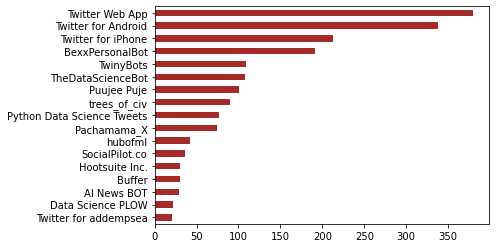

In [82]:
sources_sorted = sourceDF.loc[sourceDF['source'] > 20].sort_values('source',ascending=True)
ax = sources_sorted.source.plot(kind='barh',color='#a52a2a')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

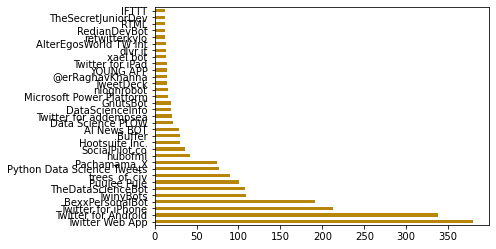

In [34]:
sources_sorted = sourceDF.loc[sourceDF['source'] > 10].sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#b8860b')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [77]:
print(tweets_df['Date'][0])

2020-08-07 14:28:23


## Identifica o volume de tweets por dia

In [79]:
from datetime import datetime

date=[]

for date_id in tweets_df['Date']:
    object_date = datetime.strptime(date_id, '%Y-%m-%d %H:%M:%S')
    only_date = f'{object_date.year}-{object_date.month}-{object_date.day}'
    if only_date not in date:
        date.append(only_date)
        
date_percent = np.zeros(len(date))

for date_id in tweets_df['Date']:
    for index in range(len(date)):
        object_date = datetime.strptime(date_id, '%Y-%m-%d %H:%M:%S')
        only_date = f'{object_date.year}-{object_date.month}-{object_date.day}'
        if only_date == date[index]:
            date_percent[index] += 1
            pass

In [85]:
dateDF = pd.DataFrame({'Qtd. Tweets': date_percent}, index=date)
dateDF

,Qtd. Tweets
2020-8-7,1.0
2020-8-8,13.0
2020-8-4,1112.0
2020-8-3,1273.0
2020-8-2,242.0


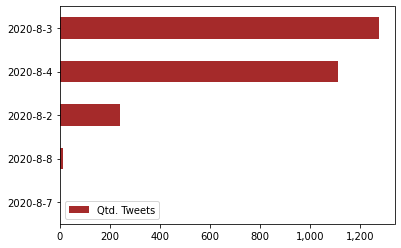

In [86]:
date_sorted = dateDF.sort_values('Qtd. Tweets',ascending=True)
ax = date_sorted.plot(kind='barh',color='#a52a2a')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## Análise de Polaridade

In [35]:
from textblob import TextBlob as tb

In [36]:
# Lista vazia para armazenar as polaridades
polarities =[]

In [37]:
polarities.append(tb(tweet).sentiment.polarity) #analisa a polaridade

In [39]:
print(f'Para a keyword utilizada: {keyword.upper()}')
print(f'A média de sentimento utilizando o TextBlob foi de {np.mean(polarities)}')

Para a keyword utilizada: DATA SCIENTIST OR DATA SCIENCE OR BIG DATA OR MACHINE LEARNING
A média de sentimento utilizando o TextBlob foi de 0.10868303511667768


In [40]:
positive = 0
negative = 0
neutral = 0

for polarity in polarities:
    if polarity > 0:
        positive += 1
    elif polarity < 0:
        negative += 1
    else:
        neutral += 1

print(f"Tweets Positivos: {positive}")
print(f"Tweets Negativos: {negative}")
print(f"Tweets Neutros: {neutral}")

#Calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

Tweets Positivos: 1142
Tweets Negativos: 178
Tweets Neutros: 1321


In [41]:
#Define variaveis
sentiments =['Positivos','Negativos','Neutros']
percents =[pos_pct,neg_pct,neu_pct]
percents

[43.241196516471035, 6.739871260886028, 50.01893222264294]

In [42]:
pie_chart = pd.Series(percents,index=sentiments,name='')
pie_chart

Positivos    43.241197
Negativos     6.739871
Neutros      50.018932
Name: , dtype: float64

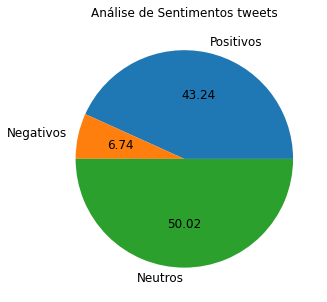

In [43]:
# Gerar (plotar) o grafico de pissa (torta)
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5,5), labels=pie_chart.index, 
                   title="Análise de Sentimentos tweets");

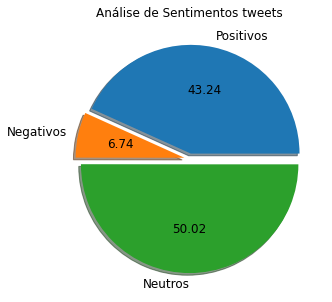

In [44]:
# Gerar (plotar) o grafico de pissa (torta)
explode = (0.05,0.05,0.05) # separa o primeiro indexe

pie_chart.plot.pie(fontsize=12, explode=explode,autopct='%.2f', shadow=True,
                   figsize=(5,5), labels=pie_chart.index, 
                   title="Análise de Sentimentos tweets");

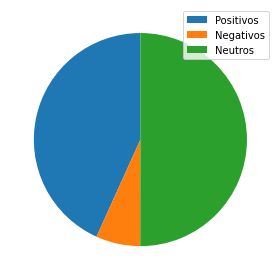

In [45]:
# Usando pacote MatplotLib

patches,text = plt.pie(percents,startangle=90)
plt.legend(patches, sentiments, loc="best")
plt.tight_layout()
plt.show()

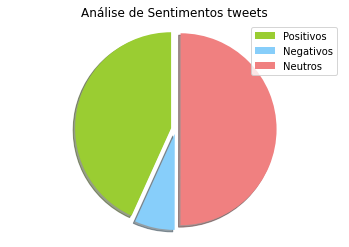

In [46]:
# Usando pacote Matpltolib 2
colors =['yellowgreen','lightskyblue','lightcoral'] # personaliza as cores
explode = (0.05,0.05,0.05) # separa o primeiro indexe

patches,text = plt.pie(percents,explode=explode, shadow=True, colors=colors,startangle=90)
plt.legend(sentiments, loc="best")
plt.axis('equal')
plt.title('Análise de Sentimentos tweets')
plt.show()

## Mapa de Calor

In [53]:
#Trabalhando com mapas
from geopy.geocoders import Nominatim
import folium
from folium import plugins

In [48]:
locator = Nominatim(user_agent ="TweeterSentiments")
exemplo = locator.geocode("Maryland, USA")

In [49]:
print(exemplo)
print(exemplo.latitude)
print(exemplo.longitude)

Maryland, United States of America
39.5162234
-76.9382069


In [50]:
geolocator = Nominatim(user_agent="TweeterSentiments")

#Lista para armazenar a latitude e longitude
latitude=[]
longitude=[]

for user_location in tweets_df[tweets_df['User Location'] != '']['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [54]:
coordenates = np.column_stack((latitude,longitude))

mape = folium.Map(zoom_start=3.)
mape.add_child(plugins.HeatMap(coordenates))
mape.save('Mapa_calor_Big_Data.html')
mape

## Nuvens de Palavras

In [55]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


In [56]:
words = ' '.join(tweets_df['Tweets'])
words_clean = ' '.join([word for word in words.split()
                       if 'https' not in word
                       and not word.startswith('@')
                       and not word.startswith('#')
                       and word != 'RT'])

In [57]:
type(words_clean)

str

In [58]:
import warnings

In [59]:
warnings.simplefilter('ignore')

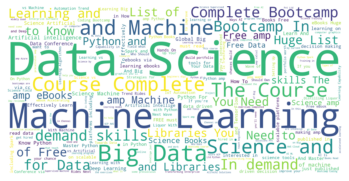

In [60]:
wc = WordCloud(min_font_size=10,
              max_font_size=300,
              background_color='white',
              mode='RGB',
              width=2000,
              height=1000,
              normalize_plurals=True).generate(words_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_with_stopwords.png', dpi=300)
plt.show()

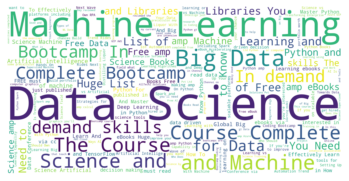

In [61]:
stopwords = set(STOPWORDS)
wc = WordCloud(stopwords = stopwords,
               min_font_size=10,
               max_font_size=300,
               background_color='white',
               mode='RGB',
               width=2000,
               height=1000,
               normalize_plurals=True).generate(words_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_withou_stopwords_wordcloud.png', dpi=300)
plt.show()


In [62]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/rafael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [154]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rafael/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
stop_words = set(stopwords.words('english'))
word_tokens  = word_tokenize(words_clean)
filtered_words = [w for w in word_tokens if not w in stop_words]
all_tweets = TreebankWordDetokenizer().detokenize(filtered_words)

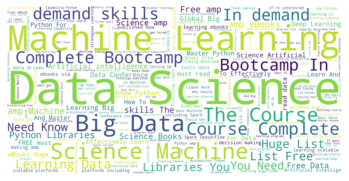

In [65]:
wc = WordCloud(min_font_size=10,
               max_font_size=300,
               background_color='white',
               mode='RGB',
               width=2000,
               height=1000,
               normalize_plurals=True).generate(all_tweets)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_withou_stopwords_nltk.png', dpi=300)
plt.show()

In [66]:
wine_mask = np.array(Image.open('wine_mask.png'))

In [67]:
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [68]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [89]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0], wine_mask.shape[1]), np.int32)
transformed_wine_mask

array([[-1389423504,       21941, -1387244384, ...,          -1,
                 -1,          -1],
       [         -1,          -1,          -1, ...,          -1,
                 -1,          -1],
       [         -1,          -1,          -1, ...,          -1,
                 -1,          -1],
       ...,
       [         -1,          -1,          -1, ...,          -1,
                 -1,          -1],
       [         -1,          -1,          -1, ...,          -1,
                 -1,          -1],
       [         -1,          -1,          -1, ...,          -1,
                 -1,          -1]], dtype=int32)

In [90]:
for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
    
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

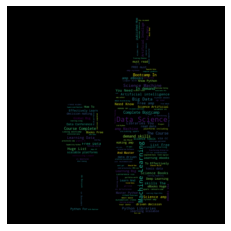

In [92]:
wc = WordCloud(mask=transformed_wine_mask,
               max_words=1000,
               background_color='black').generate(all_tweets)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Big_data_wordCloud_without_stopwords_wordcloud_mask.png', dpi=300)
plt.show()